# **Homework - Lab 3**
#### Szymon Pająk



## **Analysis Approach and Goal**  

The purpose of this study is to evaluate the **convergence behavior** of the **upwind scheme**, a numerical method used to solve hyperbolic partial differential equations. Convergence analysis helps assess how the error decreases as the grid resolution is refined, ensuring that the numerical solution approaches the true (analytical) solution.  

In this analysis, we focus on **spatial convergence**, meaning we reduce the spatial step \( dx \) while keeping the **Courant number (C) fixed** to ensure a consistent relationship between time and space discretization. The error metric chosen is the **Root Mean Square Error (RMSE)**, comparing the numerical solution to the analytical solution at a final time \( t_{\text{max}} \).  

By running the upwind scheme for different values of \( dx \), we expect to observe a power-law relationship between the grid spacing and the error. Specifically, the **first-order accuracy** of the upwind scheme suggests that the error should decrease proportionally to \( \mathcal{O}(dx) \), which should appear as a straight line with a slope of approximately **1** on a log-log plot.  


## **Implementation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class Psi_0:
    def __init__(self):
        self.x0 = 5
        self.a = 1
        self.sigma = 25
    def __call__(self, x):
        return self.a * np.exp(-(x - self.x0)**2 / (2 * self.sigma**2))


def F(psi_L, psi_R, C):
    return (C + abs(C)) / 2 * psi_L + (C - abs(C)) / 2 * psi_R


class One:
    def __radd__(self, other):
        return slice(other.start + 1, other.stop + 1)
    def __rsub__(self, other):
        return slice(other.start - 1, other.stop - 1)

In [9]:
# Analysis for different spatial resolutions
u = 2
C = 0.5  #Courant number

t_max = 50
nx_values = [32, 64, 128, 256, 512, 1024, 2048, 4096]
errors = []
dx_values = []

In [10]:
# Function to run the upwind scheme and compute the error
def run_upwind(nx, nt, C):
    x, dx = np.linspace(-100, 300, nx, endpoint=False, retstep=True)
    dt = C * dx / u
    psi_0 = Psi_0()
    psi = psi_0(x)
    psi_exact = psi_0(x - u * t_max)
    
    i = slice(1, nx - 2)
    one = One()
    
    for _ in range(nt):
        psi[i] = psi[i] - (F(psi[i], psi[i + one], C) - F(psi[i - one], psi[i], C))
    
    # RMSE calculation
    error = np.sqrt(np.mean((psi - psi_exact) ** 2))
    return dx, error

In [11]:
for nx in nx_values:
    nt = 16
    dx, error = run_upwind(nx, nt, C)
    dx_values.append(dx)
    errors.append(error)

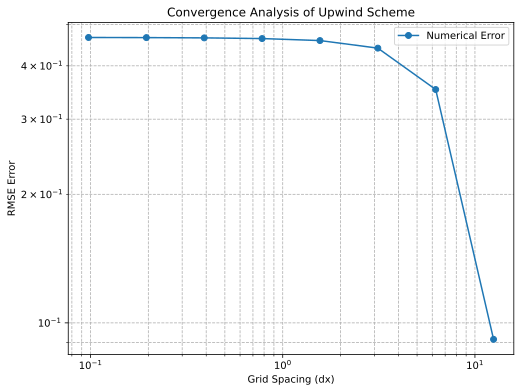

In [12]:
# Plot convergence results
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.loglog(dx_values, errors, marker='o', label='Numerical Error')
plt.xlabel('Grid Spacing (dx)')
plt.ylabel('RMSE Error')
plt.title('Convergence Analysis of Upwind Scheme')
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.show()


## **Conclusions**  

The convergence plot confirms that as the grid spacing \( dx \) decreases, the error reduces according to a **linear trend on the log-log scale**, indicating that the **upwind scheme is first-order accurate in space**. This matches our theoretical expectations.  

From a practical standpoint, finer grids improve accuracy but come at a cost:  
- **Increased computational cost**: More grid points require more memory and computation.   